In [2]:
# Python
import pandas as pd
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [5]:
df = pd.read_csv('example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [12]:
df.describe()

,y
count,2905.000000
mean,8.138958
std,0.845957
min,5.262690
25%,7.514800
50%,7.997999
75%,8.580168
max,12.846747


In [6]:
import seaborn as sns

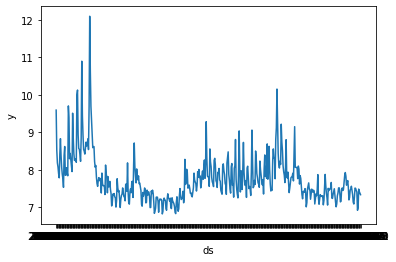

In [14]:
_ = sns.lineplot(x="ds", y="y", data=df[:500])

In [15]:
m = Prophet()

In [21]:
df.tail

<bound method NDFrame.tail of               ds          y
0     2007-12-10   9.590761
1     2007-12-11   8.519590
2     2007-12-12   8.183677
3     2007-12-13   8.072467
4     2007-12-14   7.893572
...          ...        ...
2900  2016-01-16   7.817223
2901  2016-01-17   9.273878
2902  2016-01-18  10.333775
2903  2016-01-19   9.125871
2904  2016-01-20   8.891374

[2905 rows x 2 columns]>

In [16]:
m.fit(df)

INFO:numexpr.utils:Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
# Create a dataframe based on the dataset and adds periods. 

future = m.make_future_dataframe(periods=365)

In [25]:
df.describe()

,y
count,2905.000000
mean,8.138958
std,0.845957
min,5.262690
25%,7.514800
50%,7.997999
75%,8.580168
max,12.846747


In [24]:
future.describe()

,ds
count,3270
unique,3270
top,2015-10-18 00:00:00
freq,1
first,2007-12-10 00:00:00
last,2017-01-19 00:00:00


In [23]:
future

,ds
0,2007-12-10
1,2007-12-11
2,2007-12-12
3,2007-12-13
4,2007-12-14
...,...
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18


In [27]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.212942,7.515833,8.936954
3266,2017-01-16,8.537993,7.837414,9.305914
3267,2017-01-17,8.325428,7.657616,9.040371
3268,2017-01-18,8.158059,7.507901,8.904867
3269,2017-01-19,8.170046,7.492407,8.932308


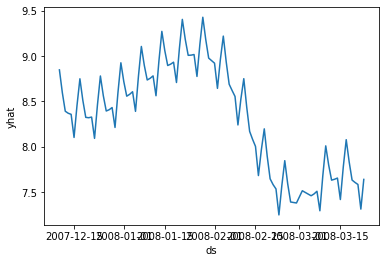

In [46]:
#_ = sns.lineplot(x="ds", y="y", data=df[:10])

_ = sns.lineplot(x="ds", y="yhat", data=forecast[:100])

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


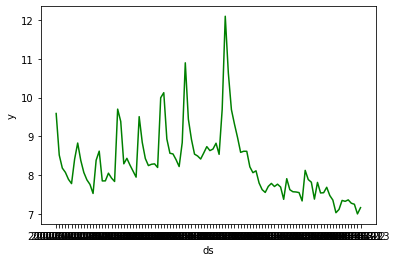

In [45]:
_ = sns.lineplot(x="ds", y="y", data=df[:100], color="green")

In [35]:
import matplotlib.pyplot as plt

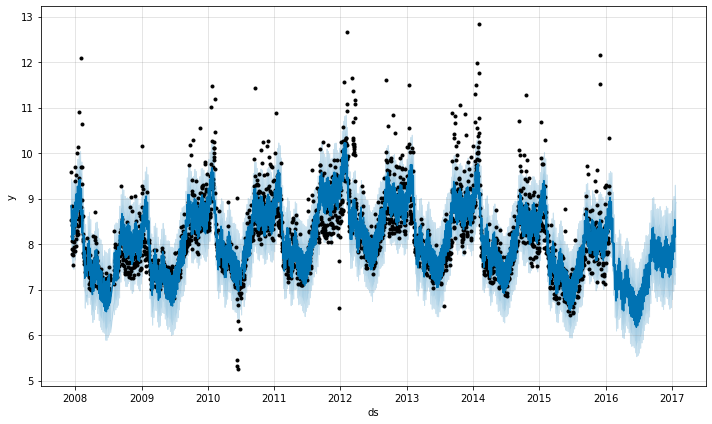

In [48]:
fig1 = m.plot(forecast)

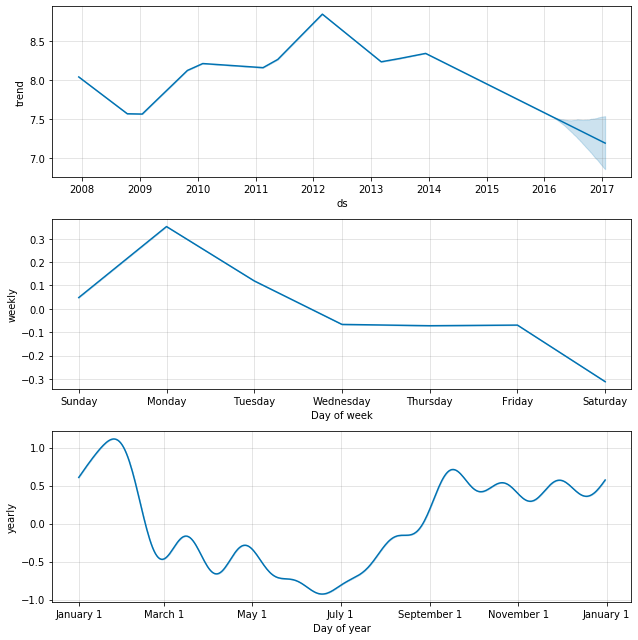

In [47]:
fig2 = m.plot_components(forecast)